## Transformations

In [56]:
# import liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# transformers convert non-normal data into normal data
# let's generate non-normal data (exponentional distribution)
np.random.seed(0)
df = np.random.exponential(size = 1000, scale = 2)
df

array([1.59174902e+00, 2.51186153e+00, 1.84644629e+00, 1.57440230e+00,
       1.10209698e+00, 2.07631859e+00, 1.15103840e+00, 4.44704883e+00,
       6.62982436e+00, 9.67204202e-01, 3.13779228e+00, 1.50534822e+00,
       1.67886569e+00, 5.19650831e+00, 1.47370710e-01, 1.82322058e-01,
       4.08511734e-02, 3.57497536e+00, 3.01156846e+00, 4.08062856e+00,
       7.69044368e+00, 3.21047912e+00, 1.23785892e+00, 3.03307195e+00,
       2.51748824e-01, 2.04286377e+00, 3.09459365e-01, 5.78884090e+00,
       1.47565456e+00, 1.07113144e+00, 6.14560706e-01, 2.97650968e+00,
       1.21816483e+00, 1.68066941e+00, 3.79371433e-02, 1.92276186e+00,
       1.89399336e+00, 1.91909595e+00, 5.75583016e+00, 2.29027792e+00,
       8.91036985e-01, 1.14906482e+00, 2.39221560e+00, 1.24230592e-01,
       2.19782496e+00, 2.22119487e+00, 4.72413411e-01, 2.76057375e-01,
       7.57923932e-01, 9.04204113e-01, 1.68885556e+00, 1.15464862e+00,
       8.90899476e+00, 2.15270225e-01, 4.68603031e-01, 3.51827107e-01,
      

In [58]:
# convert into pandas DataFrame
df = pd.DataFrame(df, columns = ['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


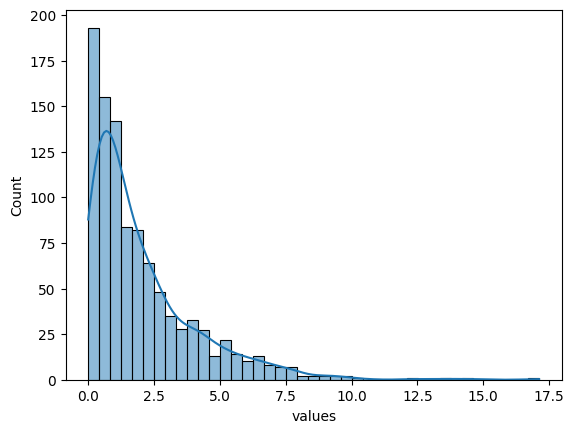

In [60]:
# checking distribution graphically 
sns.histplot(df['values'], kde = True)
plt.show()

## PowerTransformer includes (Box-Cox and Yeo-Johnson)

In [61]:
# importing transformers
from sklearn.preprocessing import PowerTransformer

In [62]:
# calling transformers
pt_box_cox = PowerTransformer(method = 'box-cox') # Assumption for Box-Cox (Data must be POSITIVE)
pt_yeo_johnson = PowerTransformer(method = 'yeo-johnson')

In [63]:
# fiting data into transformers
df['Box-Cox'] = pt_box_cox.fit_transform(df[['values']] + 1)
df['Yeo-Johnson'] = pt_yeo_johnson.fit_transform(df[['values']])

In [64]:
df.head()

,values,Box-Cox,Yeo-Johnson
0,1.591749,0.179335,0.179335
1,2.511862,0.677331,0.677331
2,1.846446,0.339698,0.339698
3,1.574402,0.167607,0.167607
4,1.102097,-0.202107,-0.202107


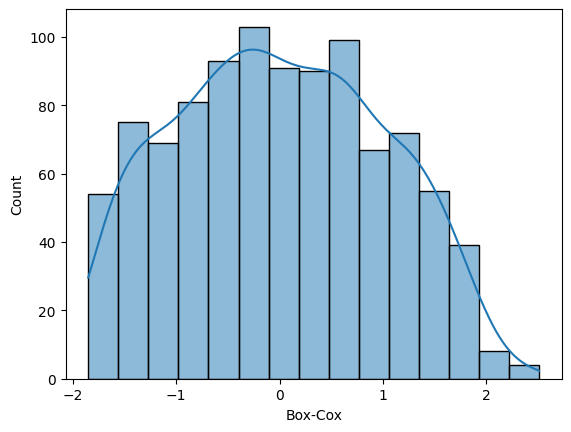

In [66]:
# plotting data after transformation
sns.histplot(df['Box-Cox'], kde = True)
plt.show()

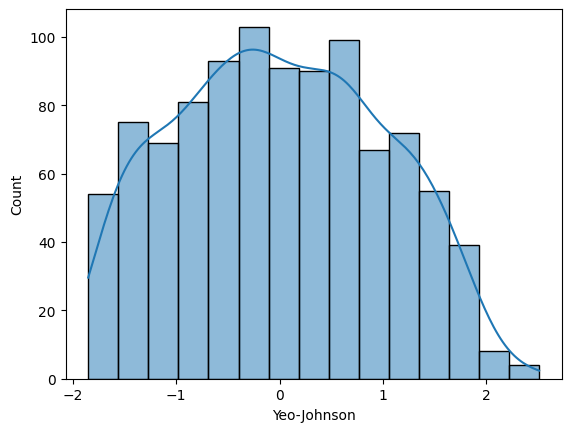

In [67]:
sns.histplot(df['Yeo-Johnson'], kde = True)
plt.show()

## Qurtile Transformer

In [68]:
np.random.seed(0)
df = np.random.exponential(size = 1000, scale = 2)
df
df = pd.DataFrame(df, columns = ['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


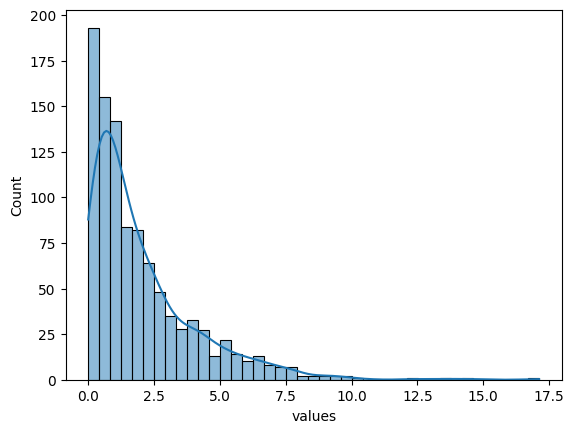

In [70]:
sns.histplot(df['values'], kde = True)
plt.show()

In [71]:
from sklearn.preprocessing import QuantileTransformer

In [72]:
qt_normal = QuantileTransformer(output_distribution = 'normal')

In [73]:
df['Quantile'] = qt_normal.fit_transform(df[['values']])

In [74]:
df.head()

,values,Quantile
0,1.591749,0.162552
1,2.511862,0.587964
2,1.846446,0.286135
3,1.574402,0.157469
4,1.102097,-0.154930


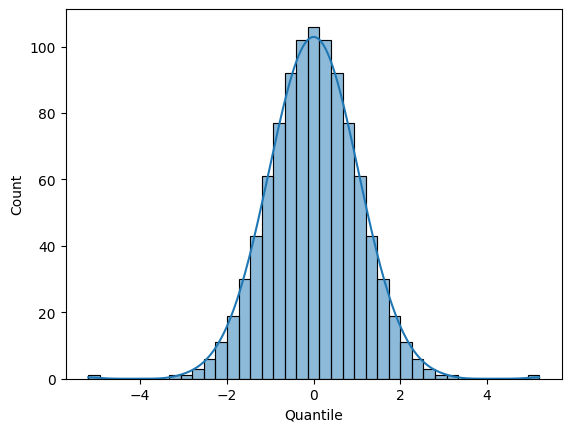

In [76]:
sns.histplot(df['Quantile'], kde = True)
plt.show()

## Log Transformation

In [77]:
import pandas as pd
import numpy as np

In [78]:
# example dataset with skewed values
df = { "values": [1,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000]}

In [79]:
df = pd.DataFrame(df)
df

,values
0,1
1,5
2,10
3,20
4,50
5,100
6,200
7,500
8,1000
9,2000


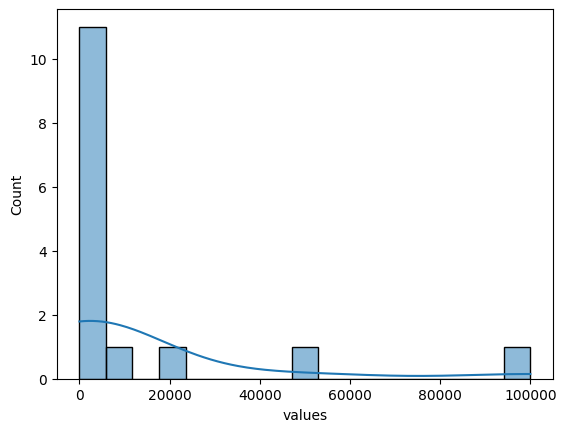

In [80]:
sns.histplot(df['values'], kde = True)
plt.show()

In [81]:
df['log_values'] = np.log(df['values'])

In [82]:
df

,values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023
5,100,4.605170
6,200,5.298317
7,500,6.214608
8,1000,6.907755
9,2000,7.600902


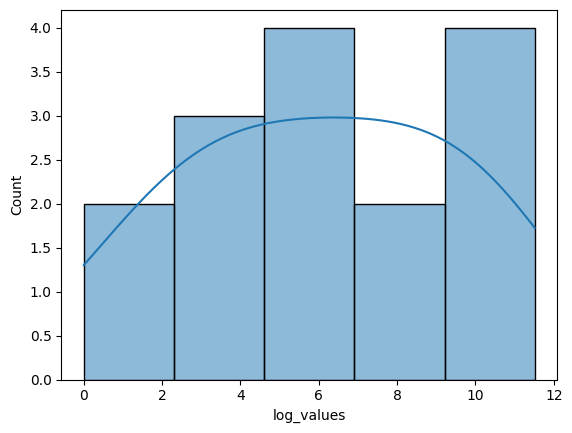

In [83]:
sns.histplot(df['log_values'], kde = True)
plt.show()